In [7]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from parse_utils import reaction_check, sticker_check, get_sentiment, map_to_month_no

# Parse out important info
threads_dir = "/Users/divyas/Downloads/facebook-divyashanmugam7/messages/inbox"
sender1 = "Divya Shanmugam"
sender2 = "Benji Lin"

def get_message_files_path(threads_dir, sender2):
    thread_names = os.listdir(threads_dir)
    rel_thread_names = [thread_name for thread_name in thread_names if (sender2.replace(' ', '') in thread_name)]
    rel_thread_sizes = [os.listdir(threads_dir + '/' + thread_name) for thread_name in rel_thread_names]
    
    thread_name = rel_thread_names[np.argsort(np.array(rel_thread_sizes))[-1]]
    return threads_dir + '/' + thread_name

message_files_path = get_message_files_path(threads_dir, sender2)
print(message_files_path)
message_files = [x for x in os.listdir(message_files_path) if 'message' in x]
html_docs = [open(message_files_path + '/' + fname, 'r').read() for fname in message_files]
soups = [BeautifulSoup(html_doc, 'html.parser') for html_doc in html_docs]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/divyas/Downloads/facebook-divyashanmugam7/messages/inbox/BenjiLin_29VCVZhzjg


In [10]:
message_divs = [] 
for soup in soups:
    message_divs.extend(soup.findAll("div", {"class": "uiBoxWhite"}))

In [15]:
all_messages = []
for message in message_divs:
    children = message.findAll('div', recursive=False)
    sender = children[0].text
    msg = children[1].text
    date_str = children[2].text
    sticker = reaction_check(message)
    reac = ""
    if sender1 in msg:
        # Reaction from me
        n_ignore = len(sender1)
        reac = msg[-n_ignore-1:-n_ignore]
        msg = msg[:-n_ignore-1]
    
    if sender2 in msg:
        # Reaction from other person 
        n_ignore = len(sender2)
        reac = msg[-n_ignore-1:-n_ignore]
        msg = msg[:-n_ignore-1]
        
    all_messages.append({'sender': sender, 
                         'message': msg, 
                         'date_str': date_str,
                         'sticker': sticker,
                         'reaction': reac,})
all_df = pd.DataFrame(all_messages)
all_df['polarity'] = all_df['message'].apply(get_sentiment)
all_df['month_no'] = all_df['date_str'].apply(map_to_month_no)
all_df['msg_length'] = all_df['message'].apply(len)
divya = all_df[all_df['sender'] == sender1]
karthik = all_df[all_df['sender'] == sender2]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def date_str_to_month_year_str(date_str): 
    year = date_str.split(' ')[2][:-1]
    month = date_str.split(' ')[0]
    month_year_str = date_str.split(' ')[0] + ' ' + year
    return month_year_str

def date_str_to_month_year_no(date_str):
    month_no_map = {'Jan': 1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 
                    'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
    year = int(date_str.split(' ')[2][:-1])*100
    month = month_no_map[date_str.split(' ')[0]]
    month_year_no = year + month
    return month_year_no

all_df['month_year_no'] = all_df['date_str'].apply(date_str_to_month_year_no)
all_df['month_year_str'] = all_df['date_str'].apply(date_str_to_month_year_str)

# Message counts

# of messages:  159544


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text xticklabel objects>)

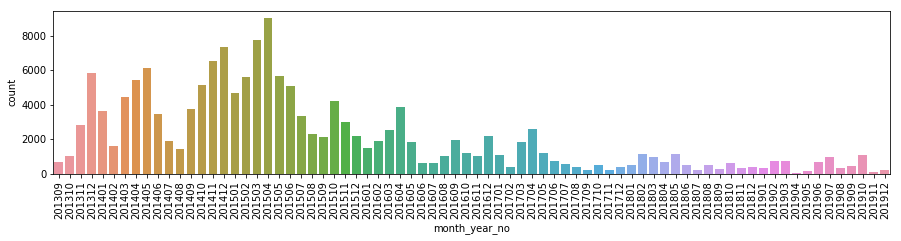

In [22]:
print("# of messages: " ,len(message_divs))
fig, _ = plt.subplots(figsize=(15, 3))
sns.countplot(x='month_year_no', data=all_df)
plt.xticks(rotation='vertical')


Sent by  Divya Shanmugam :  84460
Sent by  Benji Lin :  75084


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text xticklabel objects>)

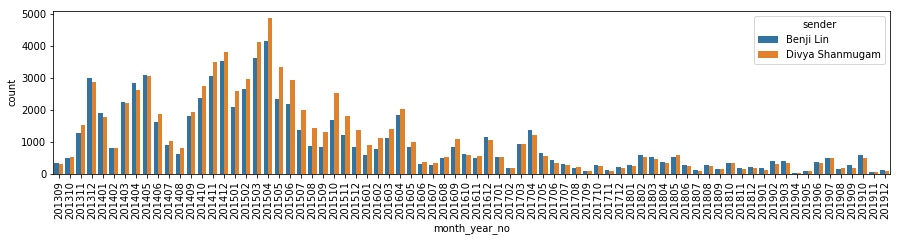

In [24]:
# person specific 2messages
print("Sent by ", sender1, ": ", len(all_df[all_df['sender'] == sender1]))
print("Sent by ", sender2, ": ", len(all_df[all_df['sender'] == sender2]))
fig, _ = plt.subplots(figsize=(15, 3))
sns.countplot(x='month_year_no', hue='sender', data=all_df)
plt.xticks(rotation='vertical')


# Message lengths

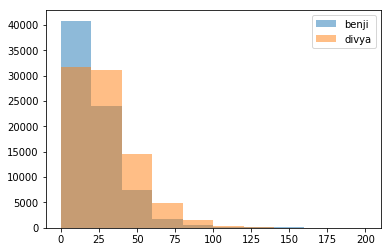

In [26]:
# Message length
divya_lens = [x for x in divya['msg_length'] if x < 300]
karthik_lens = [x for x in karthik['msg_length'] if x < 300]
plt.hist(karthik_lens, alpha=.5, bins=10, range=(0, 200), label="benji")
plt.hist(divya_lens, alpha=.5, bins=10, range=(0, 200), label="divya")
plt.legend()

In [27]:
# Histogram of the reactions for each of us
def get_react_frequency(msg_df):
    reacs = ['👍', '👎', '😆', '😍', '😠', '😢', '😮']
    react_list = np.array(list(msg_df[msg_df['reaction'] != ""]['reaction']))
    freq_dict = {}
    for reac in reacs:
        freq_dict[reac] = len(np.where(react_list == reac)[0])
    return freq_dict

divya_react_freq = get_react_frequency(divya)
karthik_react_freq = get_react_frequency(karthik)
divya_react_freq, karthik_react_freq

({'👍': 4, '👎': 0, '😆': 22, '😍': 9, '😠': 3, '😢': 9, '😮': 14},
 {'👍': 0, '👎': 1, '😆': 12, '😍': 37, '😠': 2, '😢': 6, '😮': 12})

# Sentiment Analysis

In [31]:
# sentiment analysis
from textblob import TextBlob
def get_sentiment(msg):
    return TextBlob(msg).sentiment.polarity
all_df['polarity'] = all_df['message'].apply(get_sentiment)

Karthik avg sentiment polarity:  0.0860451408351917
Divya avg sentiment polarity:  0.06924089525810243


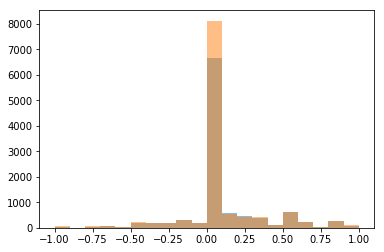

In [51]:
import numpy as np
divya_sentiment = all_df[all_df['sender'] == sender1]
karthik_sentiment = all_df[all_df['sender'] == sender2]
plt.hist(karthik_sentiment['polarity'], range=(-1, 1), bins=20, alpha=.5)
plt.hist(divya_sentiment['polarity'], range=(-1, 1), bins=20, alpha=.5)
#sns.distplot(x='polarity', hue='sender', data=all_df)
print('Karthik avg sentiment polarity: ', np.mean(karthik_sentiment['polarity']))
print('Divya avg sentiment polarity: ', np.mean(divya_sentiment['polarity']),)

# Word counts

In [107]:
divya_messages = ' '.join(list(divya['message'])).lower()
karthik_messages = ' '.join(list(karthik['message'])).lower()

print("Chettiar: ", divya_messages.count('chettiar'), karthik_messages.count('chettiar'))
print("Devakottai: ", divya_messages.count('devakottai'), karthik_messages.count('devakottai'))
print("Nachiapuram: ", divya_messages.count('nachiapuram'), karthik_messages.count('nachiapuram'))
print("India: ", divya_messages.count('india'), karthik_messages.count('india'))
print("Tamil: ", divya_messages.count('tamil'), karthik_messages.count('tamil'))

print()
print("Family: ", divya_messages.count('family'), karthik_messages.count('family'))
print("Friends: ", divya_messages.count('friend'), karthik_messages.count('friend'))

print()
print("Lololol: ", divya_messages.count('lololol'), karthik_messages.count('lololol'))
print("Haha: ", divya_messages.count('haha'), karthik_messages.count('haha'))
print("Lmao: ", divya_messages.count('lmao'), karthik_messages.count('lmao'))
print("Lel: ", divya_messages.count(' lel '), karthik_messages.count(' lel '))

print()
print("Cute: ", divya_messages.count('cute'), karthik_messages.count('cute'))
print("Chill: ", divya_messages.count('chill'), karthik_messages.count('chill'))

# more chettiar, more family
# more friends, more lmao, more cute


Chettiar:  22 8
Devakottai:  1 0
Nachiapuram:  2 0
India:  53 27
Tamil:  24 14

Family:  42 9
Friends:  93 131

Lololol:  424 156
Haha:  20 129
Lmao:  1 184
Lel:  49 7

Cute:  1 5
Chill:  38 80


In [109]:
from collections import Counter 
divya_msgs_split = divya_messages.split()
divya_counts = Counter(divya_msgs_split)

karthik_msgs_split = karthik_messages.split()
karthik_counts = Counter(karthik_msgs_split)

In [6]:
date_str = message_divs[0].findAll('div', recursive=False)[2].text
date_str.split(' ')[0] + ' ' + date_str.split(' ')[2][:-1]

'May 2014,'

In [115]:
karthik_counts.most_common(100)

[('the', 2220),
 ('i', 1932),
 ('to', 1583),
 ('a', 1401),
 ('u', 985),
 ('it', 957),
 ('and', 896),
 ('is', 872),
 ('like', 837),
 ('of', 805),
 ('so', 801),
 ('for', 801),
 ('but', 723),
 ('in', 702),
 ('was', 691),
 ('that', 676),
 ('yah', 671),
 ('not', 633),
 ('have', 575),
 ('my', 567),
 ('be', 540),
 ('you', 527),
 ('this', 476),
 ('will', 466),
 ('also', 447),
 ('on', 446),
 ('we', 444),
 ('at', 441),
 ('think', 407),
 ('do', 403),
 ('no', 393),
 ('just', 386),
 ('if', 381),
 ('good', 355),
 ("it's", 352),
 ('or', 350),
 ('what', 319),
 ('are', 314),
 ('about', 302),
 ('can', 297),
 ('would', 290),
 ("i'm", 286),
 ("don't", 272),
 ('one', 271),
 ('how', 271),
 ('get', 269),
 ('they', 254),
 ('maybe', 253),
 ('lol', 248),
 ('me', 247),
 ('time', 244),
 ('w', 241),
 ('up', 235),
 ('r', 233),
 ('more', 231),
 ('out', 228),
 ('your', 227),
 ('people', 210),
 ('did', 207),
 ('ur', 196),
 ("that's", 190),
 ('go', 190),
 ('know', 190),
 ('damn', 184),
 ('all', 184),
 ('when', 178),
 (